In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('DataF.csv')
df.head()

,sg,al,hemo,htn,dm,appet,class
0,1.020,1.0,15.4,1.0,1.0,1.0,1.0
1,1.020,4.0,11.3,0.0,0.0,1.0,1.0
2,1.010,2.0,9.6,0.0,1.0,0.0,1.0
3,1.005,4.0,11.2,1.0,0.0,0.0,1.0
4,1.010,2.0,11.6,0.0,0.0,1.0,1.0


In [3]:
y=df['class']
x=df.drop(['class'],axis=1)

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [5]:
#mulai perhitungan
score=[] 
algorithms=[] 

In [6]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'KNN score diferent valus')

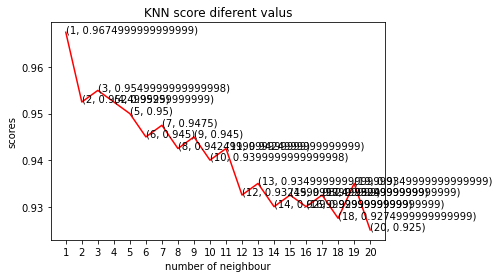

In [7]:
plt.plot([k for k in range(1,21)], knn_scores,color='red')
for i in range (1,21):
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of neighbour')
plt.ylabel('scores')
plt.title('KNN score diferent valus')

In [8]:
knn_scores

[0.9674999999999999,
 0.9524999999999999,
 0.9549999999999998,
 0.9525,
 0.95,
 0.945,
 0.9475,
 0.9424999999999999,
 0.945,
 0.9399999999999998,
 0.9424999999999999,
 0.9324999999999999,
 0.9349999999999999,
 0.9299999999999999,
 0.9324999999999999,
 0.9299999999999999,
 0.9324999999999999,
 0.9274999999999999,
 0.9349999999999999,
 0.925]

In [9]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean',n_jobs=-1,
                                      weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3,
                     weights='distance')

In [10]:
ypred=knn.predict(x_test)
hasil = accuracy_score(y_test,ypred)
print('acc = %.2f%%' %(hasil*100))

acc = 98.33%


In [11]:
tn, fp, fn, tp = confusion_matrix(y_test,ypred).ravel()
(tn, fp, fn, tp)

(44, 0, 2, 74)

In [12]:
confusion_matrix(y_test,ypred)

array([[44,  0],
       [ 2, 74]], dtype=int64)

In [13]:
target = ['class 0', 'class 1']

In [14]:
print(classification_report(y_test, ypred, target_names=target))

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        44
     class 1       1.00      0.97      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

